#### Feature Selection Methods
##### 1. Feature Importance (Tree-based models): Use models like Random Forest or XGBoost to calculate feature importance and select top features that contribute most to predictions.
##### 2. Principal Component Analysis (PCA): Reduce dimensionality while retaining most information from spectral bands.
##### 3. Statistical Tests: Use techniques like ANOVA or Chi-Square for categorical features or correlations for numerical features.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('preprocessed_dataset.csv')

In [5]:
data.head()

,index,soil_moisture,soil_temperature,454,458,462,466,470,474,478,...,930,934,938,942,946,950,year,month,day,hour
0,0.0,33.51,34.8,-0.820790,-0.933076,-0.911946,-0.918558,-0.895983,-0.937692,-0.916785,...,-0.844442,-0.848906,-0.847418,-0.852499,-0.864668,-0.841753,2017,5,23,14
1,1.0,33.49,35.2,-0.913318,-0.962229,-0.968456,-0.940140,-0.942926,-0.914833,-0.937676,...,-0.878898,-0.883832,-0.864402,-0.819999,-0.794575,-0.770620,2017,5,23,14
2,2.0,33.46,35.4,-0.874888,-1.030703,-0.966399,-0.942754,-0.956636,-0.964497,-0.940893,...,-0.855017,-0.851385,-0.823587,-0.819934,-0.828697,-0.827617,2017,5,23,14
3,3.0,33.33,35.0,-0.965790,-0.981437,-0.972359,-0.918834,-0.934312,-0.918411,-0.906604,...,-0.852920,-0.851014,-0.828813,-0.810390,-0.758144,-0.742757,2017,5,23,14
4,4.0,33.32,35.3,-0.896976,-0.961759,-0.956435,-0.953026,-0.925257,-0.906755,-0.911004,...,-0.843084,-0.825724,-0.800567,-0.786257,-0.783971,-0.784635,2017,5,23,14


#### What these methods do:
##### 1. Feature Importance from Random Forest model helps highlight which features are the most influential in predicting soil moisture.
##### 2. PCA reduces the number of dimensions while retaining the most important variance in the data, useful for hyperspectral bands.

In [7]:
X = data.drop(columns=['soil_moisture'])
y = data['soil_moisture']

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X,y)

RandomForestRegressor(random_state=42)

In [8]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances: \n", feature_importances)

Feature Importances: 
 946      0.182042
hour     0.129159
950      0.097486
942      0.063100
922      0.061201
           ...   
582      0.000066
658      0.000060
594      0.000054
year     0.000000
month    0.000000
Length: 131, dtype: float64


In [9]:
# Verify the names of the hyperspectral columns in the dataset
hyperspectral_columns = [col for col in X.columns if col.isdigit()]  # Adjust to match your column names

# Print column names to verify selection
print(f"Hyperspectral columns: {hyperspectral_columns}")

# Check if the number of hyperspectral columns matches the length of feature importances
if len(hyperspectral_columns) == len(rf.feature_importances_):
    feature_importances = pd.Series(rf.feature_importances_, index=hyperspectral_columns).sort_values(ascending=False)

    # Plot top N feature importances
    top_n = 10
    top_features = feature_importances.head(top_n)

    plt.figure(figsize=(10, 6))
    top_features.plot(kind='bar', color='skyblue')
    plt.title('Top 10 Hyperspectral Feature Importances from Random Forest')
    plt.ylabel('Importance')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print(f"Mismatch in lengths: {len(hyperspectral_columns)} hyperspectral columns vs. {len(rf.feature_importances_)} importances.")


Hyperspectral columns: ['454', '458', '462', '466', '470', '474', '478', '482', '486', '490', '494', '498', '502', '506', '510', '514', '518', '522', '526', '530', '534', '538', '542', '546', '550', '554', '558', '562', '566', '570', '574', '578', '582', '586', '590', '594', '598', '602', '606', '610', '614', '618', '622', '626', '630', '634', '638', '642', '646', '650', '654', '658', '662', '666', '670', '674', '678', '682', '686', '690', '694', '698', '702', '706', '710', '714', '718', '722', '726', '730', '734', '738', '742', '746', '750', '754', '758', '762', '766', '770', '774', '778', '782', '786', '790', '794', '798', '802', '806', '810', '814', '818', '822', '826', '830', '834', '838', '842', '846', '850', '854', '858', '862', '866', '870', '874', '878', '882', '886', '890', '894', '898', '902', '906', '910', '914', '918', '922', '926', '930', '934', '938', '942', '946', '950']
Mismatch in lengths: 125 hyperspectral columns vs. 131 importances.


##### 1. nlargest(10) and nsmallest(10): These functions extract the top 10 and bottom 10 features based on their importance.
##### 2. Two separate plots: One for top 10 features and another for bottom 10 features.
##### 3. Colors: Light green for the top features and salmon for the bottom features.

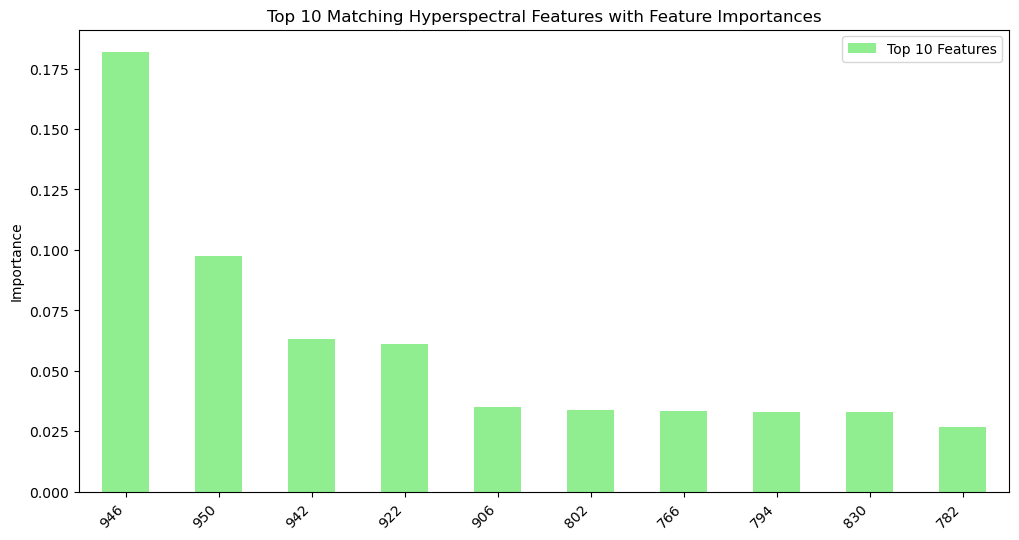

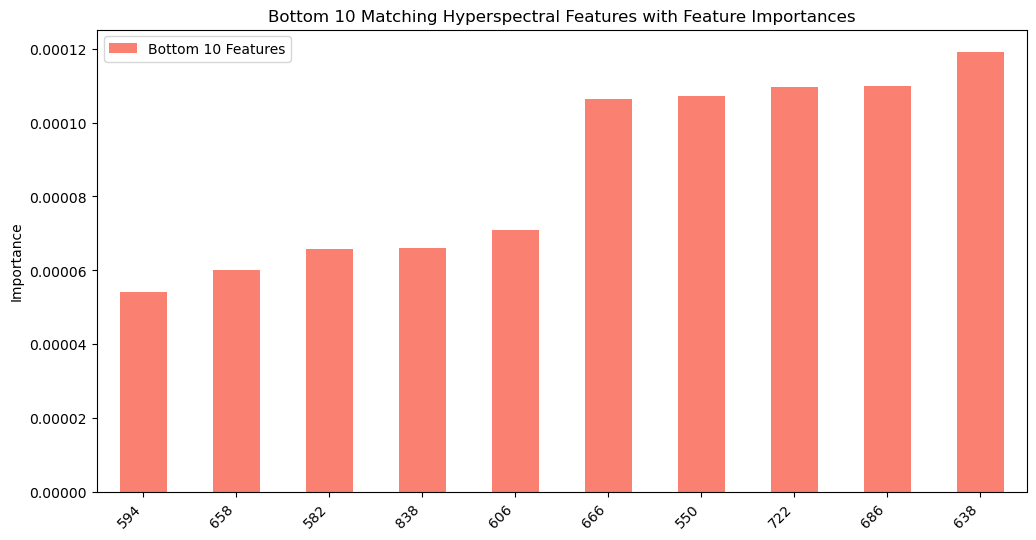

Top 10 Features and their Importances:
 946    0.182042
950    0.097486
942    0.063100
922    0.061201
906    0.034990
802    0.033559
766    0.033483
794    0.033019
830    0.032776
782    0.026863
dtype: float64

Bottom 10 Features and their Importances:
 594    0.000054
658    0.000060
582    0.000066
838    0.000066
606    0.000071
666    0.000106
550    0.000107
722    0.000110
686    0.000110
638    0.000119
dtype: float64


In [11]:
# Identify columns that match between hyperspectral columns and feature importances
matching_columns = [col for col in hyperspectral_columns if col in X.columns]

# Get the feature importances for matching columns
matching_importances = pd.Series(rf.feature_importances_, index=X.columns)[matching_columns]

# Get top 10 and bottom 10 features based on importance
top_features = matching_importances.nlargest(10)
bottom_features = matching_importances.nsmallest(10)

# Plot top 10 features
plt.figure(figsize=(12, 6))
top_features.plot(kind='bar', color='lightgreen', label='Top 10 Features')
plt.title('Top 10 Matching Hyperspectral Features with Feature Importances')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Plot bottom 10 features
plt.figure(figsize=(12, 6))
bottom_features.plot(kind='bar', color='salmon', label='Bottom 10 Features')
plt.title('Bottom 10 Matching Hyperspectral Features with Feature Importances')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Print top and bottom features
print("Top 10 Features and their Importances:\n", top_features)
print("\nBottom 10 Features and their Importances:\n", bottom_features)


In [12]:
scaler= StandardScaler()
X_scaled = scaler.fit_transform(data[hyperspectral_columns])

In [13]:
#Normalise hyperspectral data
hyperspectral_columns = [col for col in data.columns if col.isdigit()]
scaler = StandardScaler()
data[hyperspectral_columns] = scaler.fit_transform(data[hyperspectral_columns])

In [14]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

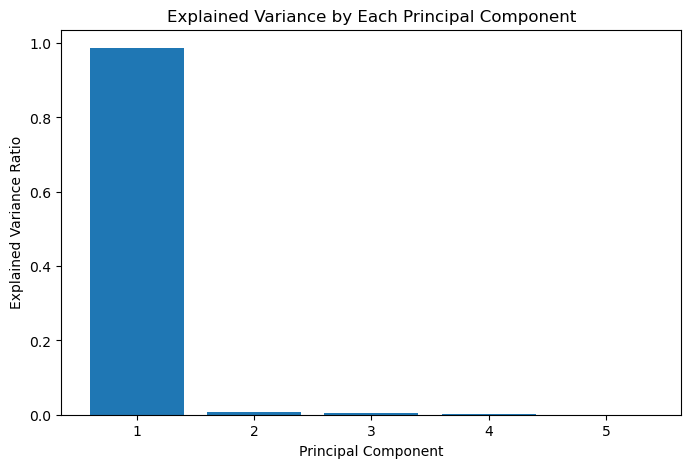

In [15]:
plt.figure(figsize=(8,5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Each Principal Component')
plt.show()

In [16]:
print(f'Cumulative variance explained: {np.cumsum(pca.explained_variance_ratio_)}')

Cumulative variance explained: [0.98659252 0.99331491 0.9970858  0.99922831 0.9994946 ]


#### ANOVA (Analysis of Variance)
##### If you're predicting a continuos target (e.g. soil moisture) and have categorical features (e.g. categorical bins for soil moisture), you can use ANOVA to determine if there are significant differences in the means of different groups.
##### Example: If you categorise moisture into bins (e.g. low, medium, high), you can test which hyperspectral bands vary significantly across those bins.

In [18]:
from scipy.stats import f_oneway

# Example of ANOVA for categorical soil moisture levels vs. hyperspectral bands
# Create categorical bins for soil moisture (if not already)
moisture_bins = pd.cut(data['soil_moisture'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Perform ANOVA for the first few hyperspectral columns
f_stat, p_values = f_oneway(data['454'][moisture_bins == 'Very Low'],
                             data['454'][moisture_bins == 'Low'],
                             data['454'][moisture_bins == 'Medium'],
                             data['454'][moisture_bins == 'High'],
                             data['454'][moisture_bins == 'Very High'])

print(f"ANOVA F-statistic: {f_stat}, p-value: {p_values}")


ANOVA F-statistic: 350.1145456532913, p-value: 6.613121618086687e-163


#### Chi-Square Test
##### This is suitable for categorical features and categorical target variables. It's useful for testing the independence between two categorical variables (e.g. moisture levels and categorical bins of spectral values).

##### To apply the Chi-Square test for feature selection, you need to have categorical data. Since the dataset is continuos (soil_moisture), the Chi-Square test is not directly applicable. However, if you categorise the continuos variable (e.g. soil moisture) into bins, you can apply Chi-Square to test the independence between the categorical soil moisture levels and the hyperspectral bands.

In [20]:
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import chi2_contingency

# Bin the soil moisture into categories (low, medium, high, etc.)
binning = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
data['moisture_category'] = binning.fit_transform(data[['soil_moisture']])

# Select a few hyperspectral columns for the test
hyperspectral_columns = ['454', '458', '462']

# Create a contingency table for chi-square test
contingency_table = pd.crosstab(data['moisture_category'], data[hyperspectral_columns[0]])

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")


Chi-Square Statistic: 1358.0
P-Value: 0.47958850448675033


#### Explanation:
##### 1. Binning: We categorise continuous soil moisture into bins (e.g. low, meduim, high)
##### 2. Contigency Table: Cross-tabulate the categorised moisture levels with the hyperspectral band.
##### 3. Chi-Square Test: Test the independence of the two variables.

##### The p-value will help you determine if there's a significant relationship between the features.